# Лабораторная работа №0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасет и узнаем его размер:

In [2]:
data = pd.read_csv('telecom_churn.csv')

In [3]:
print(data.shape)

(3333, 11)


In [4]:
data.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


В датасете нет никаких пропущенных данных.

#### Описание датасета

* **Churn** - целевая переменная, перестанет клиент пользоваться услугами или нет
* AccountWeeks - количество недель, при которых у пользователя активный аккаунт
* ContractRenewal - 1, если клиент продлял недавно договор, иначе - 0
* DataPlan - 1, если у клиента есть тарифный план, 0, если нет
* DataUsage - ежемесячное количество гигабайт
* CustServCalls - количество обращений в службу поддержки
* DayMins - среднее время в минутах за месяц
* DayCalls - среднее количество звонков в месяц
* MonthlyCharge - средний счет за месяц
* OverageFree - самая большая плата за перерасход за последний год

#### Матрица корреляции

Посмотрим на зависимость данных между собой:

In [ ]:
data.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


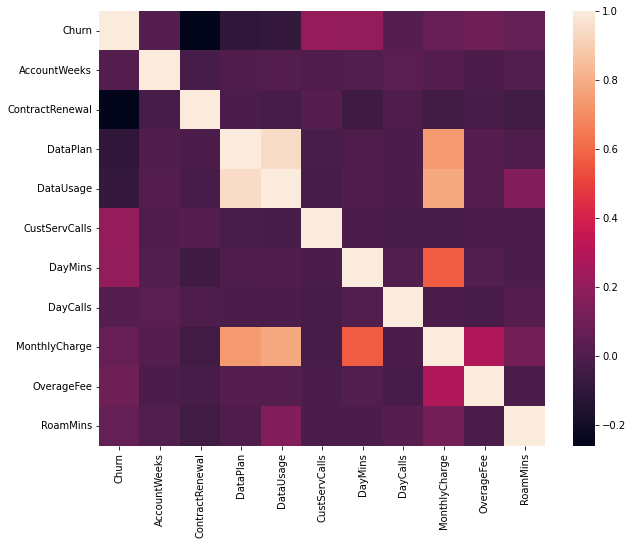

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(data.corr())
plt.show()

In [ ]:
corr_matrix = data.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn              1.000000
CustServCalls      0.208750
DayMins            0.205151
OverageFee         0.092812
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
DataUsage         -0.087195
DataPlan          -0.102148
ContractRenewal   -0.259852
Name: Churn, dtype: float64

Сделаем некоторые выводы исходя из анализа матрицы корреляции:
Наиболее сильная корреляция целевой переменной наблюдается с CustServCall, DayMins и ContractRenewal.

#### Распределение признаков

In [ ]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

Посмотрим на распределение признаков

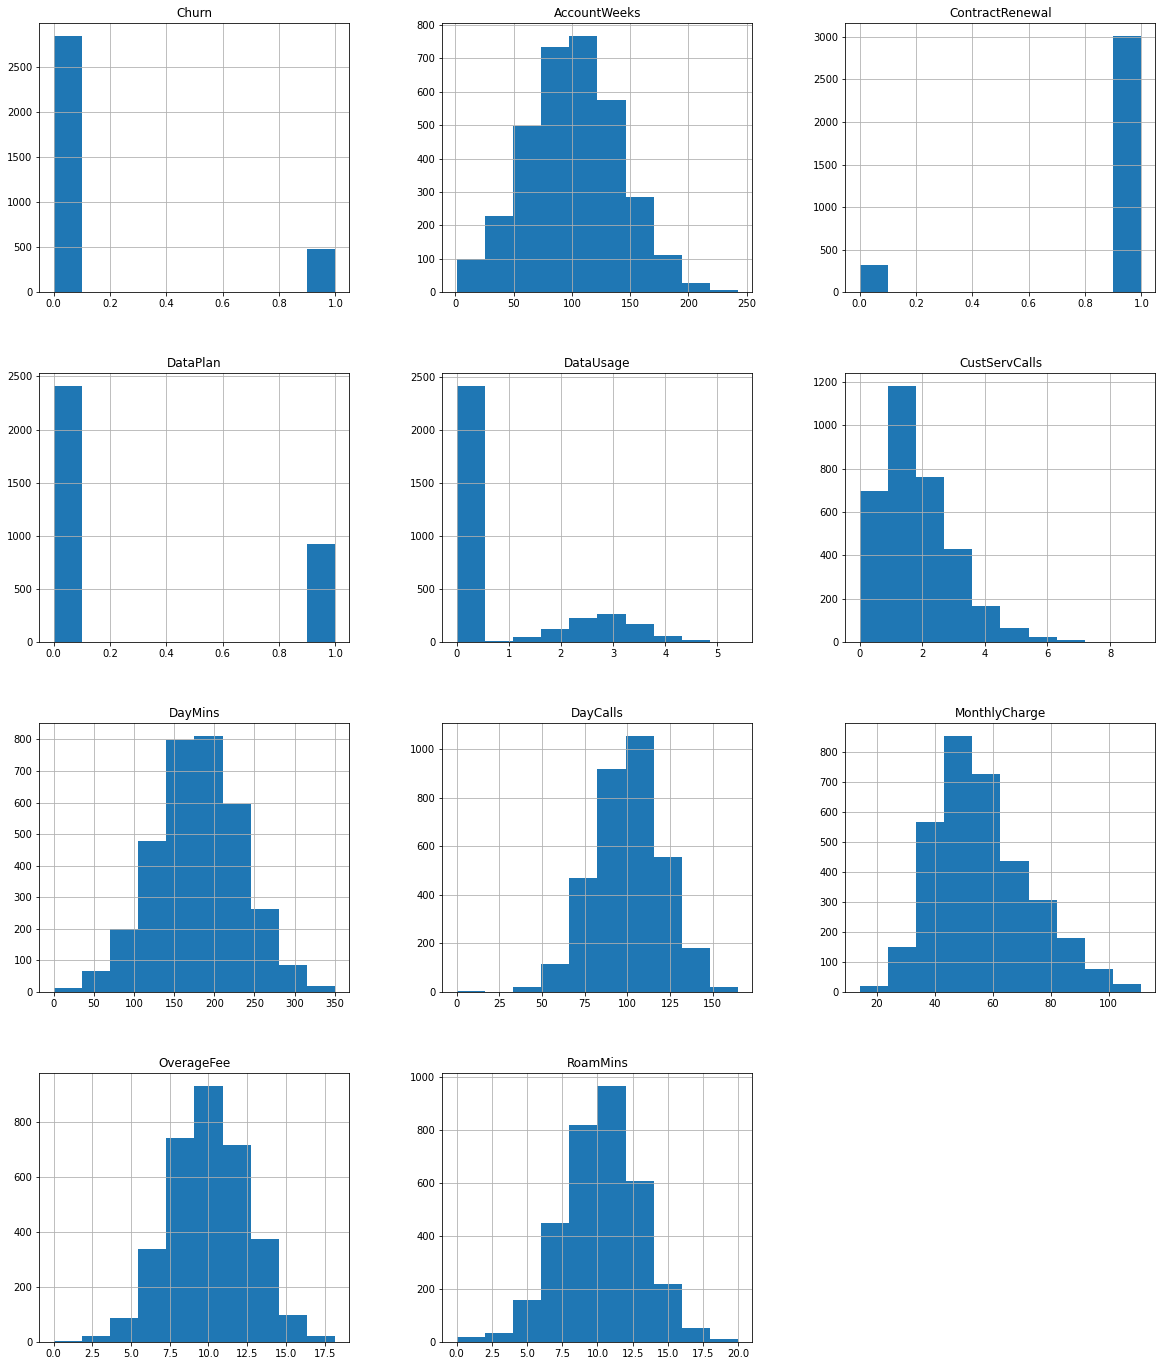

In [ ]:
columns = list(data.columns)
data.hist(columns, layout=(8, 3), figsize=(20, 50))
plt.show()

#### Соотношение классов

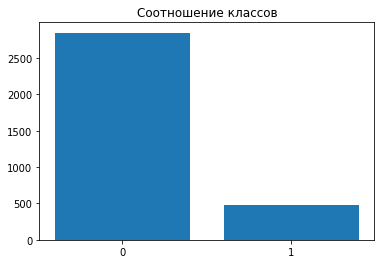

In [ ]:
indexes = [0, 1]
cnts = data['Churn'].value_counts().values

plt.title("Соотношение классов")
plt.xticks(indexes)
plt.bar(indexes, cnts)
plt.show()

Видно, что классы являются несбалансированными, так что необходимо сделать oversampling

In [ ]:
sample = data[data['Churn'] == 1]
while data[data['Churn'] == 1].shape[0] + sample.shape[0] < data[data['Churn'] == 0].shape[0]:
    data = pd.concat([data, sample])
data = pd.concat([data, sample.iloc[:data[data['Churn'] == 0].shape[0] - data[data['Churn'] == 1].shape[0]]])

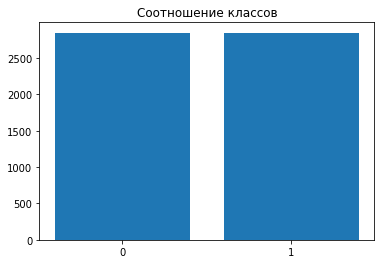

In [ ]:
indexes = [0, 1]
cnts = data['Churn'].value_counts().values

plt.title("Соотношение классов")
plt.xticks(indexes)
plt.bar(indexes, cnts)
plt.show()

### Вывод

В ходе выполнения лабораторной работы был проведен анализ данных, для их дальнейшего использования при обучении линейной модели.